In [199]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [200]:
data1=pd.read_csv("F:\M 20.02.2023\downloads\AAPL (1).csv")

In [201]:
data1.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0


In [202]:
data1.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [203]:
data1.shape

(10016, 7)

In [204]:

fraction = 0.25  # Specify the fraction of rows to keep, e.g., 50%
data1 = data1.sample(frac=fraction)

In [205]:
data1.shape

(2504, 7)

In [206]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2504 entries, 6362 to 9789
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2504 non-null   object 
 1   Open       2504 non-null   float64
 2   High       2504 non-null   float64
 3   Low        2504 non-null   float64
 4   Close      2504 non-null   float64
 5   Adj Close  2504 non-null   float64
 6   Volume     2504 non-null   float64
dtypes: float64(6), object(1)
memory usage: 156.5+ KB


In [207]:
#remove the null values
data1.dropna(inplace=True)

In [208]:
data1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [209]:
data1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2504.000000,2504.000000,2504.000000,2504.000000,2504.000000,2.504000e+03
mean,9.224026,9.319523,9.133662,9.228872,8.665040,3.411960e+08
std,17.200414,17.386467,17.037039,17.225926,16.828098,3.347597e+08
min,0.049665,0.049665,0.049107,0.049107,0.038743,4.905600e+06
25%,0.275290,0.281250,0.268694,0.276741,0.232859,1.345163e+08
50%,0.435937,0.441964,0.426339,0.435268,0.365903,2.305800e+08
75%,11.712143,11.859107,11.609553,11.658660,10.074706,4.231458e+08
max,127.142502,127.485001,123.832497,125.010002,125.010002,4.190480e+09


In [210]:
data1.shape

(2504, 7)

In [211]:

numeric_columns = data1.select_dtypes(include=['number'])
median_less_than_mean = (numeric_columns.median() < numeric_columns.mean()).all()
print(median_less_than_mean)

True


In [212]:
data1["Date"]=pd.to_datetime(data1["Date"])

In [213]:

print("Min date value : {}".format(data1["Date"].min()))
print("Max date value : {}".format(data1["Date"].max()))

Min date value : 1980-12-15 00:00:00
Max date value : 2020-08-27 00:00:00


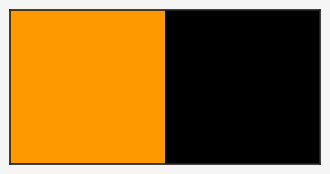

In [214]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
colors = ['#FF9900','#000000']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
sns.palplot(colors, size=2)

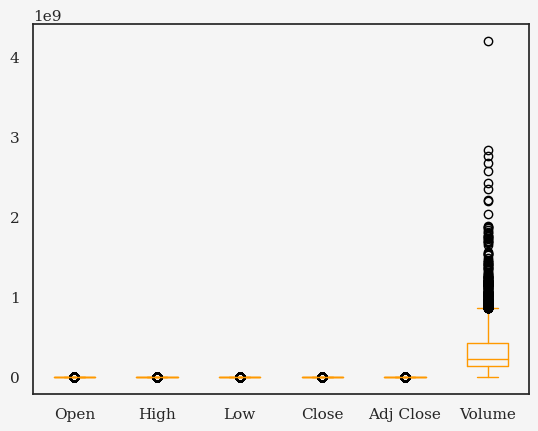

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
numeric_columns = data1.select_dtypes(include=['number'])
numeric_columns.plot(kind='box')
plt.show()

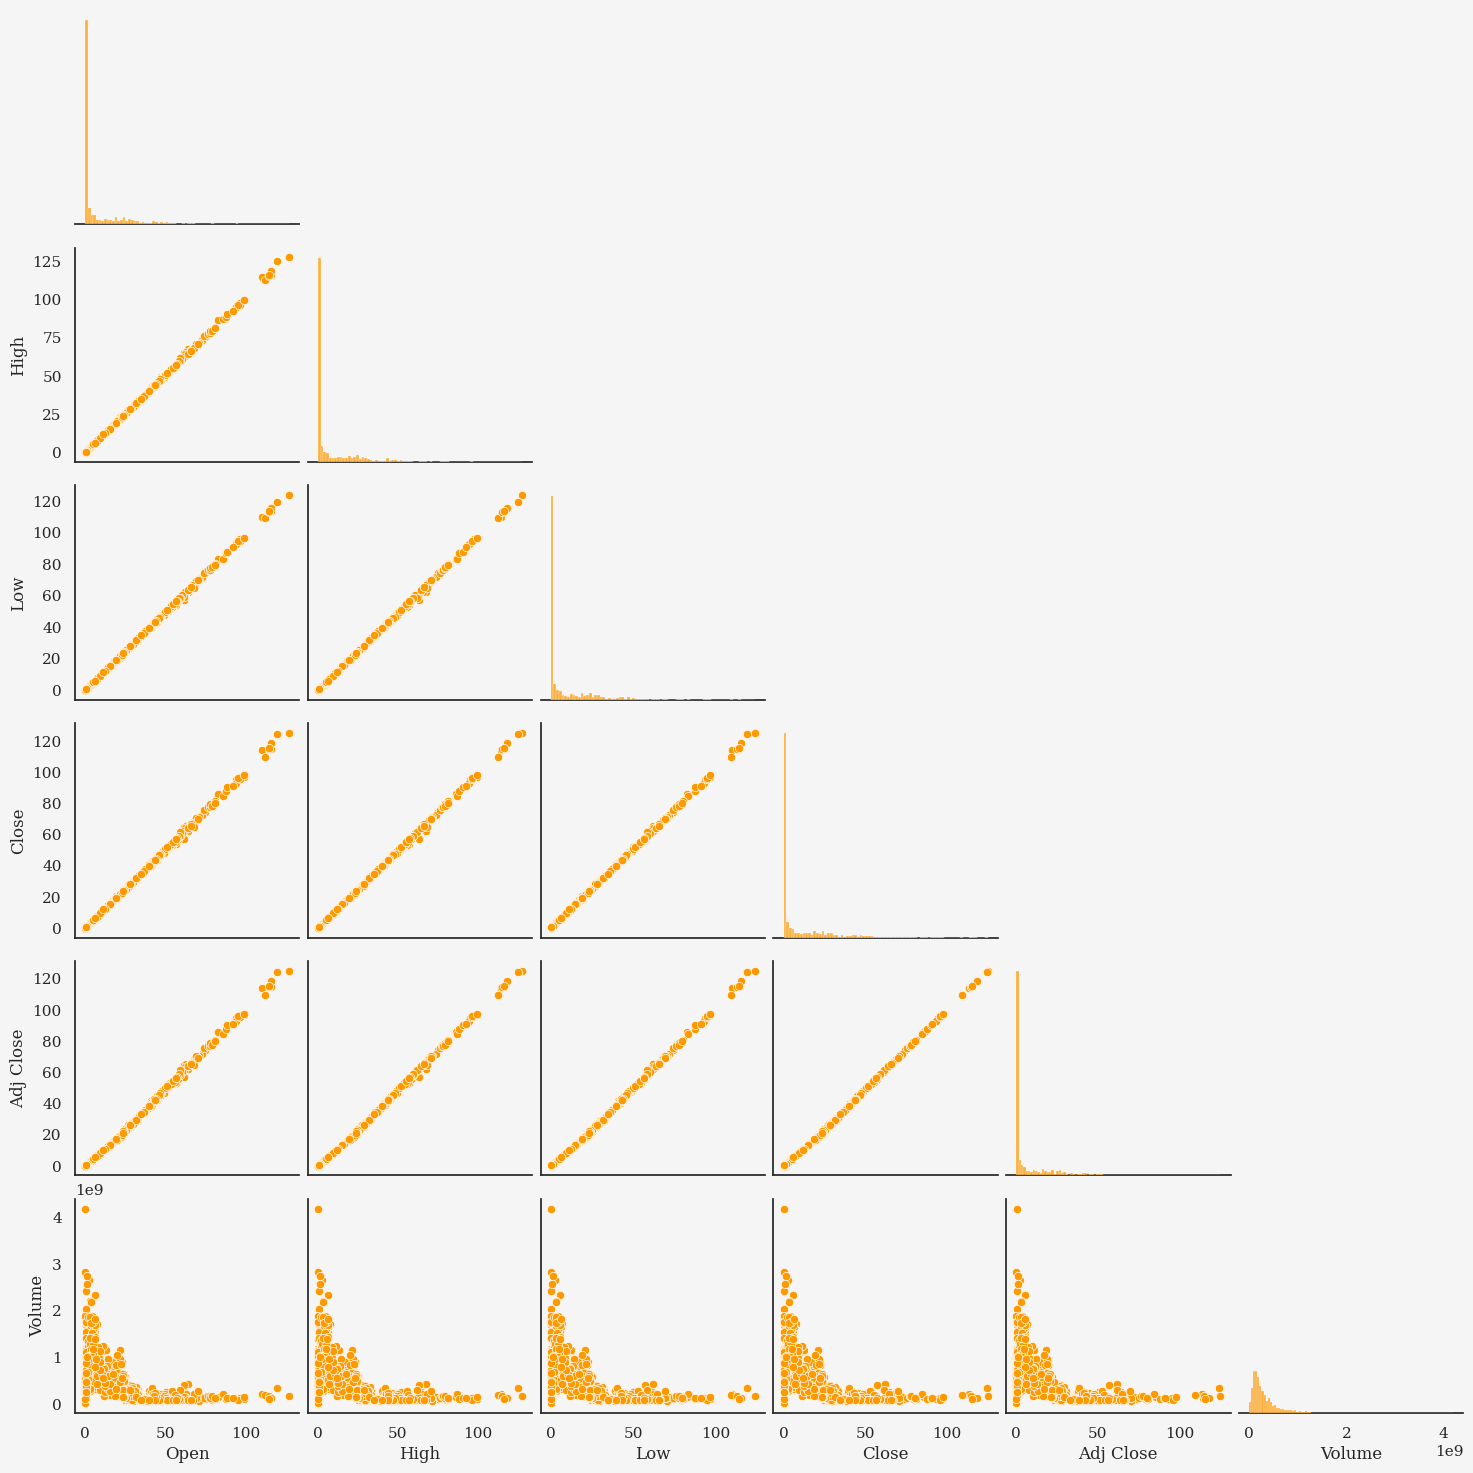

In [216]:
sns.pairplot(data1,corner=True)

In [217]:
data1.corr()['Close']

Date         0.708067
Open         0.999840
High         0.999918
Low          0.999932
Close        1.000000
Adj Close    0.999151
Volume      -0.148470
Name: Close, dtype: float64

In [218]:
X=data1[['Volume','Open','High']]
y=data1['Close']

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [220]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
model = LinearRegression()
model.fit(X_train,y_train)
set_config(display='diagram')
pred=model.predict(X_test)
scaler=np.round(model.score(X_test, y_test),3) * 100
r2=np.round(r2_score(y_test,pred),3)
mse=np.round(mean_squared_error(y_test,pred),3)
mae=np.round(mean_squared_error(y_test,pred),3)

Accuracy score : 100.0 %
R2 Score : 1.0
Mean Squared error : 0.058
Mean Absolute error : 0.058


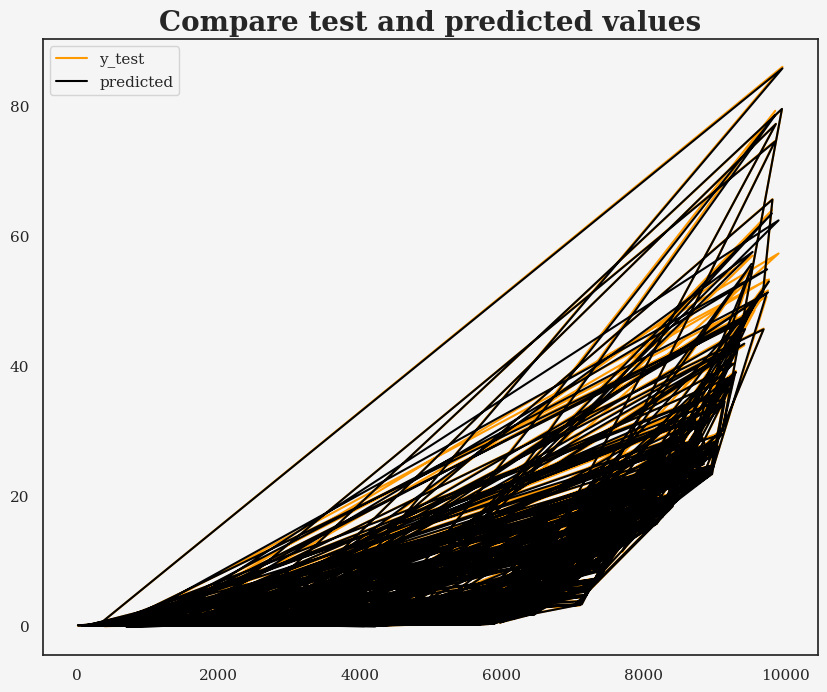

In [222]:


fig=plt.figure(figsize=(10,8))
p=pd.Series(pred, index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test','predicted'])
plt.title("Compare test and predicted values", size=20, weight='bold')
print('Accuracy score : {} %'.format(scaler))
print('R2 Score : {}'.format(r2))
print('Mean Squared error : {}'.format(mse))
print('Mean Absolute error : {}'.format(mae))

In [223]:
X=data1[['Open','High']]
y=data1['Close']
length=100
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=42)
training_set = X.iloc[:1000].values
test_set = X.iloc[1000:].values
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaler.fit_transform(training_set)
test_set_scaled=scaler.transform(test_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(length, len(training_set)):
    X_train.append(training_set_scaled[i-length:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
y_test = []
for i in range(length, len(test_set)):
    X_test.append(test_set_scaled[i-length:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [224]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [225]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 13s 210ms/step - loss: 0.0235 - val_loss: 0.0227
Epoch 2/100
29/29 [==============================] - 4s 153ms/step - loss: 0.0228 - val_loss: 0.0225
Epoch 3/100
29/29 [==============================] - 4s 152ms/step - loss: 0.0227 - val_loss: 0.0229
Epoch 4/100
29/29 [==============================] - 4s 155ms/step - loss: 0.0231 - val_loss: 0.0222
Epoch 5/100
29/29 [==============================] - 6s 194ms/step - loss: 0.0226 - val_loss: 0.0225
Epoch 6/100
29/29 [==============================] - 5s 171ms/step - loss: 0.0225 - val_loss: 0.0221
Epoch 7/100
29/29 [==============================] - 5s 168ms/step - loss: 0.0226 - val_loss: 0.0222
Epoch 8/100
29/29 [==============================] - 5s 170ms/step - loss: 0.0225 - val_loss: 0.0222
Epoch 9/100
29/29 [==============================] - 5s 171ms/step - loss: 0.0228 - val_loss: 0.0226
Epoch 10/100
29/29 [==============================] - 5s 171ms/step - loss: 0.0228 - val_l

In [226]:
pred=model.predict(X_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test
test['pred']=pred.flatten()
test

44/44 [==============================] - 3s 34ms/step


,test,pred
0,0.000664,0.081916
1,0.000779,0.081928
2,0.004353,0.081595
3,0.171209,0.080941
4,0.185841,0.080125
...,...,...
1399,0.002670,0.080649
1400,0.000289,0.080357
1401,0.002997,0.079956
1402,0.003208,0.079486


R2 Score : -0.0
Mean Squared error : 0.02
Mean Absolute error : 0.02


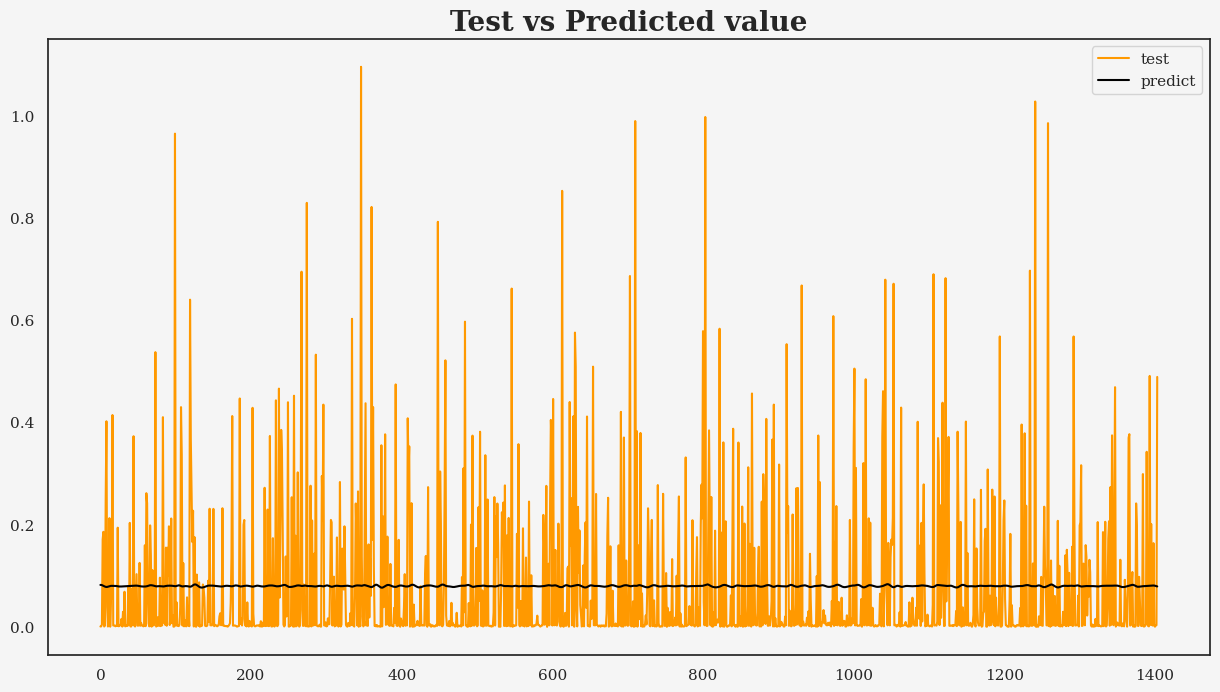

In [228]:
fig=plt.figure(figsize=(15,8))
plt.title("Test vs Predicted value", size=20, weight='bold')
plt.plot(test)
plt.legend(['test','predict'])
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)
print('R2 Score : {}'.format(r2))
print('Mean Squared error : {}'.format(mse))
print('Mean Absolute error : {}'.format(mae))

In [229]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)